# 2603655_DataAcquisition

## Week7 20240917

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
* [Tableau](https://public.tableau.com/app/profile/yuttapong.m/vizzes)
---

ref: [perplexity: DimensionReduction](https://www.perplexity.ai/page/kaarldmitikh-muul-dimension-re-wJrtaOg1T7KF9qIWR_wsgg)

## Factor Analysis

In [1]:
# !pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/42.8 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=8e019202fb72dd6dbcc78977cac534296ed27326ebf5de28e8acb2a1a8b6ca36
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


### Ordinal Y: restaurant_ratings

chi_square = 3483.110518887466 p-value = 0.0

kmo = 0.7530909737031266

Eigen values
[3.21249898 1.10132021 0.34387252 0.23716281 0.10514549]

             fact-1  fact-2
Taste         0.938   0.052
Service       0.796  -0.147
Ambiance      0.815   0.000
Value         0.008   0.771
Cleanliness   0.896   0.377

                 fact-1  fact-2
Factor Var        2.980   0.761
Propotion Var     0.596   0.152
Commulative Var   0.596   0.748



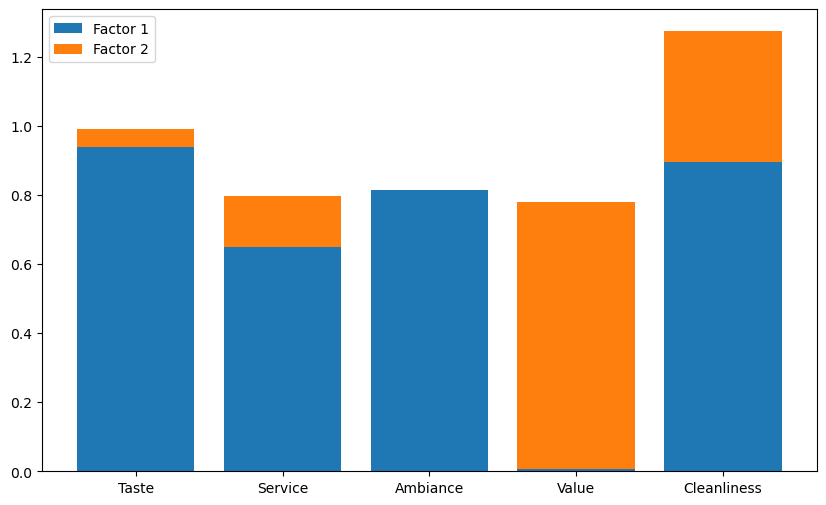

C:\Users\khala\AppData\Local\Temp\ipykernel_27380\617575957.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt,(df_factor_loadings['fact-1'][i],
C:\Users\khala\AppData\Local\Temp\ipykernel_27380\617575957.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_factor_loadings['fact-2'][i]),
C:\Users\khala\AppData\Local\Temp\ipykernel_27380\617575957.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([0,df

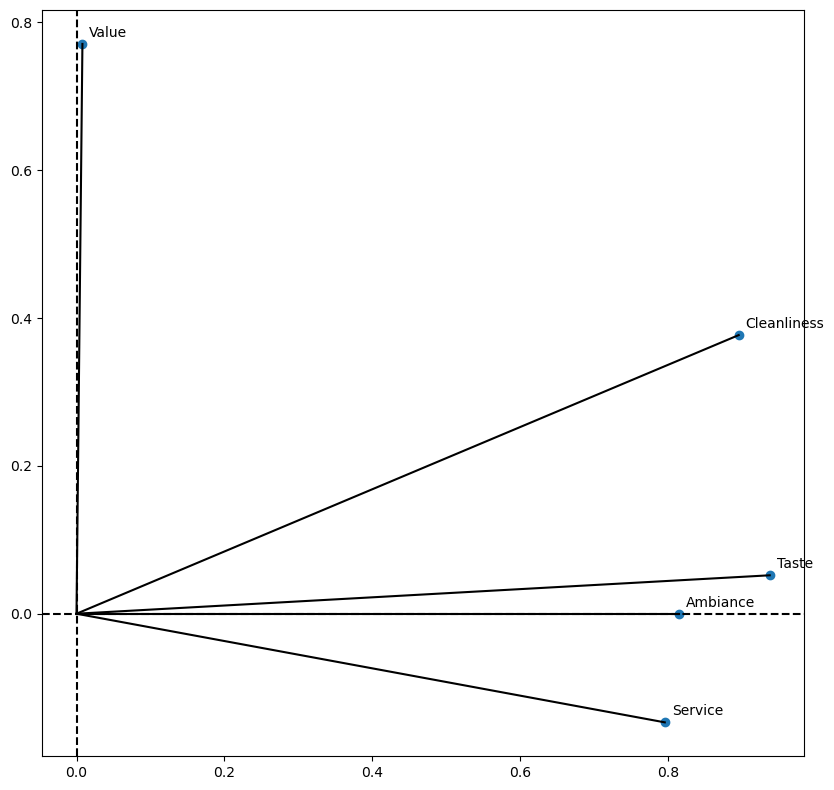

,Taste,Service,Ambiance,Value,Cleanliness,quality,value4money
0,0.885622,-0.239783,0.488812,0.327550,1.123019,0.793818,0.753478
1,0.308480,-0.311314,0.304665,0.336407,0.467907,0.265195,0.478106
2,0.200989,0.270600,0.483397,-1.180879,0.159989,0.383002,-0.698061
3,0.655256,2.026813,1.042613,-1.194448,0.190529,0.897723,-1.389136
4,-0.515890,0.337805,-0.666379,0.992047,0.319359,-0.220253,0.986290
5,0.058950,-0.836570,0.354533,-0.351031,0.304701,0.112296,0.208267
6,1.684758,1.801703,-0.073653,0.644375,1.529524,1.461904,0.519669
7,0.612637,-0.080735,0.457349,0.461124,0.556522,0.457618,0.419303
8,0.406090,0.568443,-0.144358,0.325206,0.766695,0.499935,0.527643
9,0.395135,-0.047278,0.491289,-0.541875,-0.363197,0.122344,-0.792415


In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/restaurant_ratings.csv')
# data.info()

# ตรวจความพร้อมข้อมูล
chi_square, p_value = calculate_bartlett_sphericity(data)
print(f'chi_square = {chi_square} p-value = {p_value}',end='\n\n')

kmo_all, kmo_model = calculate_kmo(data)
print(f'kmo = {kmo_model}', end='\n\n')

# Factor Exploratory
fa = FactorAnalyzer(rotation=None)
fa.fit(data)
ev, v = fa.get_eigenvalues()
print('Eigen values')
print(ev,end='\n\n')

# Factor Creation
components = ['fact-1','fact-2']
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
x = fa.fit(data)

loadings = fa.loadings_.round(3)
df_factor_loadings = pd.DataFrame(loadings,columns=components,index=data.columns)
print(df_factor_loadings)
print()

factor_variance = [fa.get_factor_variance()[i].tolist() for i in range(3)]
df_factor_variance = pd.DataFrame(factor_variance,columns=components,
                                  index = ['Factor Var','Propotion Var','Commulative Var'])
print(df_factor_variance.round(3))
print()

# factor loading BAR plot
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(df_factor_loadings.index,df_factor_loadings['fact-1'],label='Factor 1')
ax.bar(df_factor_loadings.index,df_factor_loadings['fact-2'],
       bottom=df_factor_loadings['fact-1'],label='Factor 2')
ax.legend()
plt.show()

# factor loading BIPLOT plot
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(df_factor_loadings['fact-1'],df_factor_loadings['fact-2'],marker='o')
for i,txt in enumerate(df_factor_loadings.index):
  ax.annotate(txt,(df_factor_loadings['fact-1'][i],
                   df_factor_loadings['fact-2'][i]),
                  xytext=(5,5),textcoords='offset points')
for i in range(len(df_factor_loadings)):
  ax.plot([0,df_factor_loadings['fact-1'][i]],
          [0,df_factor_loadings['fact-2'][i]],'k-')
ax.axhline(y=0,color='k',linestyle='--')
ax.axvline(x=0,color='k',linestyle='--')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

# factor score
fa_score = fa.transform(data)
df_fa_score = pd.DataFrame(fa_score,columns=['quality','value4money'])
df = data.join(df_fa_score[['quality','value4money']])
display(df.head(20))

## Principal Component Analysis

### Categorical Y: smart_city

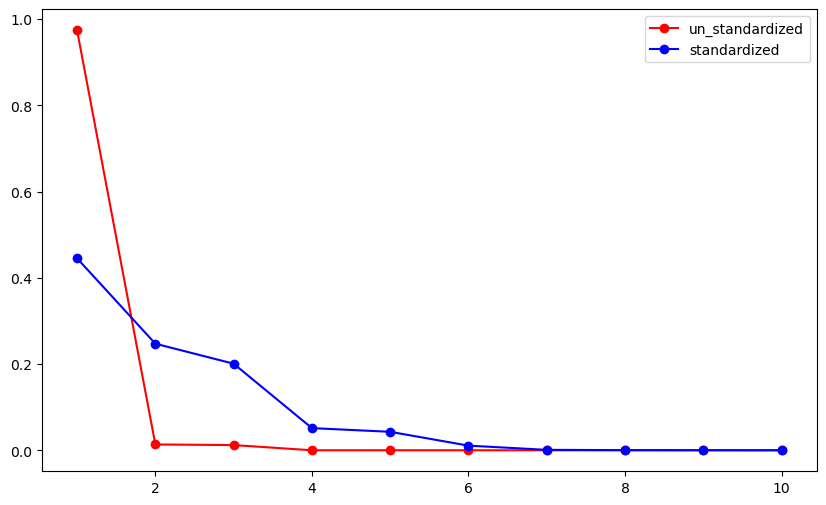

un_standardized
component 1-1 explain 97.44% of variance
component 1-2 explain 98.79% of variance
component 1-3 explain 100.00% of variance
component 1-4 explain 100.00% of variance
component 1-5 explain 100.00% of variance
component 1-6 explain 100.00% of variance
component 1-7 explain 100.00% of variance
component 1-8 explain 100.00% of variance
component 1-9 explain 100.00% of variance
component 1-10 explain 100.00% of variance

standardized
component 1-1 explain 44.54% of variance
component 1-2 explain 69.26% of variance
component 1-3 explain 89.35% of variance
component 1-4 explain 94.49% of variance
component 1-5 explain 98.77% of variance
component 1-6 explain 99.85% of variance
component 1-7 explain 99.95% of variance
component 1-8 explain 99.98% of variance
component 1-9 explain 100.00% of variance
component 1-10 explain 100.00% of variance


<Figure size 1200x800 with 0 Axes>

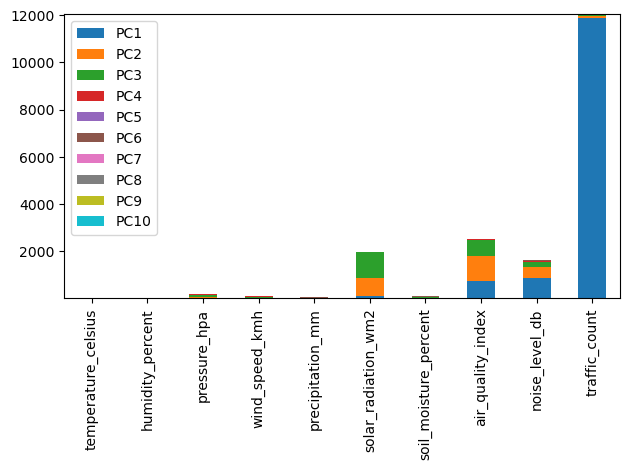

<Figure size 1200x800 with 0 Axes>

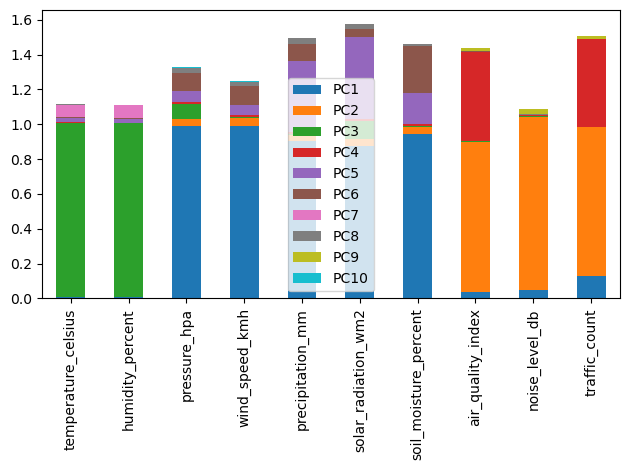

,PC1,PC2,PC3
0,3.305042,-2.804007,-2.370286
1,2.054503,-0.330881,-0.057331
2,-1.615434,-0.590385,-2.588806
3,2.374798,-1.776447,0.338433
4,-0.431812,-1.284658,0.265027


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('data/smart_city.csv')
# df.info()

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# perform PCA
pca_unstandardized = PCA()
x_unstandardized = pca_unstandardized.fit_transform(df)
pca_standardized = PCA()
x_standardized = pca_standardized.fit_transform(df_standardized)

# Scree plot
plt.figure(figsize=(10,6))
plt.plot(range(1,11),pca_unstandardized.explained_variance_ratio_,
         'ro-',label='un_standardized')
plt.plot(range(1,11),pca_standardized.explained_variance_ratio_,
         'bo-',label='standardized')
plt.legend()
plt.show()

# commulative explained variance
print('un_standardized')
cummulative_variance = np.cumsum(pca_unstandardized.explained_variance_ratio_)
for i, ratio in enumerate(cummulative_variance):
  print(f'component 1-{i+1} explain {ratio:.2%} of variance')
print()
print('standardized')
cummulative_variance = np.cumsum(pca_standardized.explained_variance_ratio_)
for i, ratio in enumerate(cummulative_variance):
  print(f'component 1-{i+1} explain {ratio:.2%} of variance')

def plot_feature_importance(pca,df,title):
  loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                          columns=[f'PC{i}' for i in range(1,len(df.columns)+1)],
                          index=df.columns)
  plt.figure(figsize=(12,8))
  loadings.abs().plot(kind='bar',stacked=True)
  plt.tight_layout()
  plt.show()

plot_feature_importance(pca_unstandardized,df,'Un_standardized')
plot_feature_importance(pca_standardized,df,'Standardized')

# display(df.sample(20))

# PC Score
pc_name = [f'PC{i+1}' for i in range(x_standardized.shape[1])]
df_pc_score = pd.DataFrame(x_standardized,columns=pc_name)
display(df_pc_score[['PC1','PC2','PC3']].head(5))

## Recursive Feature Elimination

### Categorical Y: churn_data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/churn_data.csv')
# df.info()
# display(df.head())

df = pd.get_dummies(df,columns=['contract_type','internet_service','payment_method','gender'],
                    drop_first=True)
# df.info()

X = df.drop('churn',axis=1)
y = df['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# perform RFE
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=5,step=1)
rfe = rfe.fit(X_train_scaled,y_train)

print(X.columns[rfe.support_])

df_feature_ranking = pd.DataFrame({
                        'feature':X.columns,
                        'ranking':rfe.ranking_,
                        'selected':rfe.support_
                      })
display(df_feature_ranking.sort_values('ranking'))

churn_rate = df['churn'].mean()
print(f'Churn rate: {churn_rate:.2%}')

Index(['monthly_charges', 'total_charges', 'customer_service_calls',
       'contract_type_One year', 'contract_type_Two year'],
      dtype='object')


,feature,ranking,selected
0,monthly_charges,1,True
1,total_charges,1,True
6,customer_service_calls,1,True
11,contract_type_One year,1,True
12,contract_type_Two year,1,True
13,internet_service_Fiber optic,2,False
2,tenure,3,False
14,internet_service_No,4,False
17,payment_method_Mailed check,5,False
16,payment_method_Electronic check,6,False


Churn rate: 10.36%


In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

selected_features = X.columns[rfe.support_]

X_train_selected = X_train_scaled[:,rfe.support_]
X_test_selected = X_test_scaled[:,rfe.support_]

# logreg = LogisticRegression(random_state=55)
logreg = LogisticRegression(random_state=55,class_weight='balanced')
logreg.fit(X_train_selected,y_train)

y_pred = logreg.predict(X_test_selected)
y_pred_class = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test,y_pred_class)
print(f'accuracy = {accuracy:.3f}')

precision = precision_score(y_test,y_pred_class)
print(f'precision = {precision:.3f}')

recall = recall_score(y_test,y_pred_class)
print(f'recall = {recall:.3f}')

f1 = f1_score(y_test,y_pred_class)
print(f'f1 = {f1:.3f}')

accuracy = 0.551
precision = 0.113
recall = 0.469
f1 = 0.182


## Lasso Regularization

### Ordinal Y: House_data

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv('data/house_data.csv')
X = df.drop(columns=['house_price'])
y = df['house_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# perform LR
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)

coefficients = pd.DataFrame({
                   'Feature':X.columns,
                   'Coefficient':lasso.coef_
                  })
print(coefficients.sort_values(by='Coefficient',key=abs,ascending=False))
print()
non_zero_coef = coefficients[coefficients['Coefficient']!=0]
print(non_zero_coef['Feature'].to_list())

selected_features = list()
selected_features.append(['living_area'])
selected_features.append(['living_area','avg_household_income'])
selected_features.append(['living_area','avg_household_income','house_age'])

for selected_feature in selected_features:
  print(selected_feature)
  lasso = Lasso(alpha=0.1)
  X_train_selected = pd.DataFrame(X_train_scaled,columns=X_train.columns)[selected_feature]
  X_test_selected = pd.DataFrame(X_test_scaled,columns=X_train.columns)[selected_feature]

  lasso.fit(X_train_selected,y_train)
  y_pred = lasso.predict(X_test_selected)

  mse=mean_squared_error(y_test,y_pred)
  print(f'Mean Squared Error = {mse}')

  r2 = r2_score(y_test,y_pred)
  print(f'R2 = {r2}')


                   Feature  Coefficient
0              living_area    25.838980
10    avg_household_income     8.486538
3                house_age    -3.504695
8        air_quality_score     2.486764
1                 bedrooms     0.967115
4      distance_to_station    -0.925637
2                bathrooms     0.345604
11          parking_spaces     0.247873
12                has_pool     0.207434
18  public_transport_index     0.137243
13            has_security     0.116237
15              common_fee    -0.046255
7         distance_to_mall     0.000000
6     distance_to_hospital     0.000000
5       distance_to_school     0.000000
14              house_type    -0.000000
16               elevation     0.000000
17       distance_to_river     0.000000
9               crime_rate     0.000000

['living_area', 'bedrooms', 'bathrooms', 'house_age', 'distance_to_station', 'air_quality_score', 'avg_household_income', 'parking_spaces', 'has_pool', 'has_security', 'common_fee', 'public_transport